# Predicting Car Prices with KNNRegressor
**Exploring Basic ML techniques for learning purposes** 
![predict_car2](predict_car1.png)

## Introdution:
In this project, We'll practice the some a basic machine learning workflow we've learned so far to predict a car's market price using its attributes. 

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle.

This data set consists of three types of entities: 

1. The specification of an auto in terms of various characteristics

2. Its assigned insurance risk rating, 

3. Its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

### Data Dictionary:

|Attribute|Description|
|:--------|:----------|
|symboling| -3, -2, -1, 0, 1, 2, 3|
|normalized-losses| continuous from 65 to 256|
|make|alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot,plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo
|fuel-type| diesel, gas|
|aspiration| std, turbo|
|num-of-doors| four, two|
|body-style| hardtop, wagon, sedan, hatchback, convertible|
|drive-wheels| 4wd, fwd, rwd|
|engine-location| front, rear|
|wheel-base| continuous from 86.6 120.9|
|length| continuous from 141.1 to 208.1|
|width| continuous from 60.3 to 72.3|
|height| continuous from 47.8 to 59.8|
|curb-weight| continuous from 1488 to 4066|
|engine-type| dohc, dohcv, l, ohc, ohcf, ohcv, rotor|
|num-of-cylinders| eight, five, four, six, three, twelve, two|
|engine-size| continuous from 61 to 326|
|fuel-system| 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi|
|bore| continuous from 2.54 to 3.94|
|stroke| continuous from 2.07 to 4.17|
|compression-ratio| continuous from 7 to 23|
|horsepower| continuous from 48 to 288|
|peak-rpm| continuous from 4150 to 6600|
|city-mpg| continuous from 13 to 49|
|highway-mpg| continuous from 16 to 54|
|price: TARGET| continuous from 5118 to 45400|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [3]:
pd.options.display.max_columns = 50

In [4]:
# Import dataset
cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
cars.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

- We can observe that columns do not have names as they are in the dataset documentation. We need to rename them to 

In [6]:
cols = ['symboling', 'normalized-losses', 'make', 
        'fuel-type', 'aspiration', 'num-of-doors', 
        'body-style', 'drive-wheels', 'engine-location',
        'wheel-base', 'length', 'width', 'height', 
        'curb-weight', 'engine-type', 'num-of-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 
        'compression-rate', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Gathering Summary Statistics and Information

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


- Though we have 10 out of 26 columns in numerical Dtype, there are certainly more columns that are numerical but they are in object Dtype

Apparently, df.info() displays that we do not have null values in our dataset. However, it can be seen that there are **null values masked with '?'**. There might be other ways null are not showing up as NaNs.

In [9]:
for col in cars.columns:
    print('-'*50)
    print('COLUMN NAME:',col)
    print(cars[col].value_counts())

--------------------------------------------------
COLUMN NAME: symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
--------------------------------------------------
COLUMN NAME: normalized-losses
?      41
161    11
91      8
150     7
128     6
134     6
104     6
94      5
103     5
74      5
102     5
95      5
168     5
85      5
65      5
148     4
122     4
118     4
106     4
93      4
83      3
154     3
101     3
137     3
125     3
115     3
145     2
87      2
110     2
197     2
158     2
188     2
192     2
153     2
194     2
81      2
108     2
129     2
89      2
164     2
119     2
113     2
121     1
186     1
107     1
77      1
90      1
231     1
78      1
142     1
256     1
98      1
Name: normalized-losses, dtype: int64
--------------------------------------------------
COLUMN NAME: make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru       

- We usually **can't have any missing values** if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the `normalized-losses` column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns.


After some consideration, we can say that following columns are numeric and continuous and hence, they should be in numerical Dtype
- `normalized-losses` 
- `wheel-base` 
- `length` 
- `width` 
- `height` 
- `curb-weight` 
- `engine-size` 
- `bore` 
- `stroke` 
- `compression-rate`
- `horsepower` 
- `peak-rpm` 
- `city-mpg` 
- `highway-mpg` 
- `price`

## Data Cleaning 

In [10]:
# Lets replace '?' with NaN
cars = cars.replace('?', np.nan)

In [11]:
# Gather the columns of Numerical/Continuous nature
num_cols = ['normalized-losses', 'wheel-base', 'length', 
            'width', 'height', 'curb-weight', 'engine-size', 
            'bore', 'stroke', 'compression-rate', 
            'horsepower', 'peak-rpm', 'city-mpg', 
            'highway-mpg', 'price']

num_cars = cars[num_cols]

In [12]:
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
num_cars.shape

(205, 15)

In [14]:
# Convert the Dtypes of the numerical columns to Float
num_cars = num_cars.astype(float)
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


Lets see the **dataframe with null values** in our numerical columns of the dataset.

In [15]:
num_cars[num_cars['normalized-losses'].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
9,NaN,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
14,NaN,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0,24565.0
15,NaN,103.5,189.0,66.9,55.7,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,30760.0
16,NaN,103.5,193.8,67.9,53.7,3380.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
17,NaN,110.0,197.0,70.9,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0


- There are many options to tackle the NaNs in `normalized-losses` column from replacing all NaNs with mean or mode to deleting the columns entirely. 
- Building up gradually, **lets delete the rows with null values for our target variable, `price`**


In [16]:
num_cars = num_cars.dropna(subset=['price'])
num_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Lets impute the rest of the Null Values with mean of their columns

In [17]:
num_cars = num_cars.fillna(num_cars.mean())
num_cars.isnull().sum().sum()

0

### Normalization of Data 
Except for the **target variable**, `price`, lets normalize all the columns

In [18]:
# Isolate the price column (to keep it away from normalization)
price_col = num_cars['price']

In [19]:
# Normalize the remaining data
num_cars = (num_cars - num_cars.min()) / (num_cars.max() - num_cars.min())

# Fix the target back, without having being normalized 
num_cars['price'] = price_col

---

###  Univariate k-nearest neighbors models. 
Starting with simple models before moving to more complex models helps us structure code workflow and understand the features better.

Lets make a simple function to structure the workflow

In [20]:
def knn_train_test(train_col_name, target_col_name, df):
    '''
    The function encapsulates the training and 
    simple validation process. It assumes 
    default value of k=5
    
    Args:
        train_col_name: Train's Column name
        target_col_name: Target Column name
        df : DataFrame
    Returns:
        RMSE of the column
    '''
   
    # Intantiate model
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    half = int(rand_df.shape[0] / 2)
    
    # One for train other for test
    train_df = rand_df.iloc[0:half]
    test_df = rand_df.iloc[half:]
    
    # Fit a KNN model to train_df (features and target)
    knn.fit(train_df[[train_col_name]], train_df[target_col_name])
    
    
    # Predict on test
    prediction = knn.predict(test_df[[train_col_name]])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col_name], prediction)
    rmse = np.sqrt(mse)
    return rmse

#### Lets try training and testing univariate models

In [21]:
# Dictionary to store our results
dict_rmse_uni = {}

In [22]:
# From columns names of 'num_cars', lets drop target variable 'price' name
train_cols = num_cars.columns.drop('price')
train_cols

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [23]:
# Iterate in train_cols, and train each of the columns with target, 'price'
for each_col in train_cols:
    rmse_val = knn_train_test(each_col, 'price', num_cars)
    dict_rmse_uni[each_col] = rmse_val # Append the result of each to the dictionary

In [24]:
# Convert into a Series
ser_rmse_uni = pd.Series(dict_rmse_uni)
ser_rmse_uni.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Text(0.5, 1.0, 'Features and their RMSE ($) at default k')

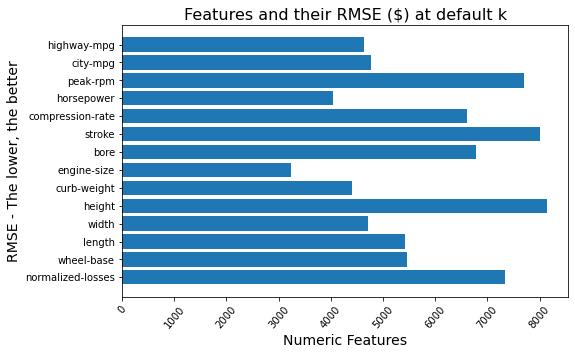

In [25]:
plt.figure(figsize=(8,5))
plt.barh(ser_rmse_uni.index, ser_rmse_uni.values)
plt.xticks(rotation=50)
plt.xlabel('Numeric Features', fontsize=14)
plt.ylabel('RMSE - The lower, the better', fontsize=14)
plt.title('Features and their RMSE ($) at default k', fontsize=16)

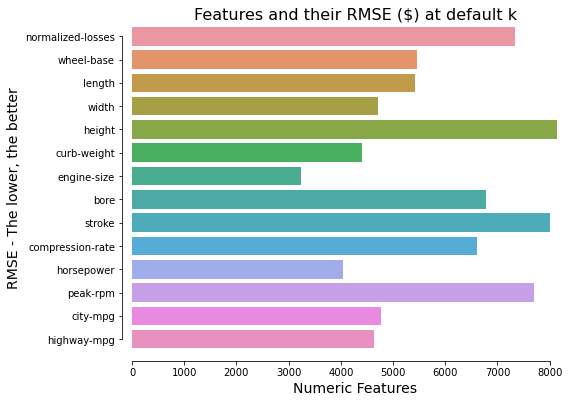

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x=ser_rmse_uni, y=ser_rmse_uni.index)

# Settings
plt.xlabel('Numeric Features', fontsize=14)
plt.ylabel('RMSE - The lower, the better', fontsize=14)
plt.title('Features and their RMSE ($) at default k', fontsize=16)

# Aesthetics
sns.despine(offset=10, trim=True)


- From the results with default value of k, we can see that 
    - `engine size` has the lowest RMSE with target variable `price`
    - `horse-power` and `curb-weight` are also among the variables with the least RMSE

 Lets modify the function to accept **a parameter for the k value**. 
 *K by default is set as 5. This means it will take the 5 nearest points to the target into consideration*
 
 For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9)


In [27]:
def knn_train_test(train_col_name, target_col_name, df):
    '''
    The function encapsulates the training and 
    simple validation process. It takes multiple
    parameters for k.
    
    Args:
        train_col_name: Train's Column name
        target_col_name: Target Column name
        df : DataFrame
    Returns:
        RMSE of the column
    '''
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    half = int(rand_df.shape[0] / 2)
    
    # One for train other for test
    train_df = rand_df.iloc[0:half]
    test_df = rand_df.iloc[half:]
    
    # K values 
    #k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    k = [1, 3, 5, 7, 9]
    
    # Dictionary to store results
    k_rmse = {}
    
    for k_val in k:
        knn = KNeighborsRegressor(n_neighbors=k_val)
        # Fit a KNN model to train_df (features and target)
        knn.fit(train_df[[train_col_name]], train_df[target_col_name])


        # Predict 
        prediction = knn.predict(test_df[[train_col_name]])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col_name], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k_val] = rmse
    return k_rmse

In [28]:
dict_k_rmse_uni = {}
for each_col in train_cols:
    rmse_val = knn_train_test(each_col, 'price', num_cars)
    dict_k_rmse_uni[each_col] = rmse_val
dict_k_rmse_uni

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


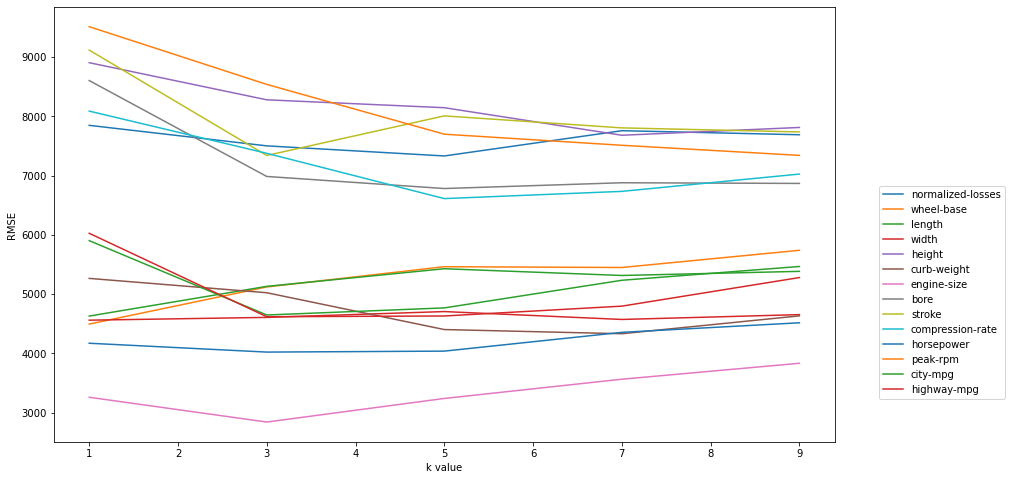

In [29]:
fig = plt.figure(figsize=(14,8))

for k,v in dict_k_rmse_uni.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, label="{}".format(k))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.legend(bbox_to_anchor = (1.05, 0.6))



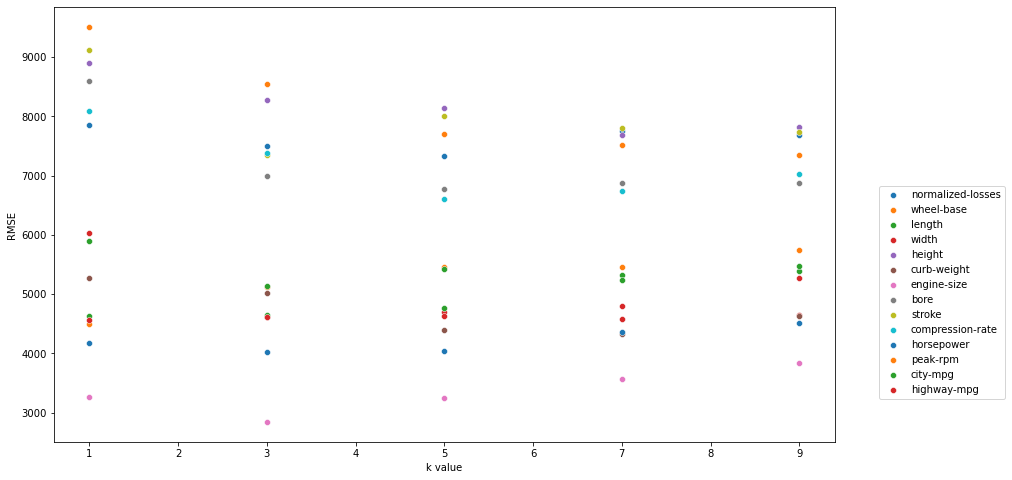

In [30]:
fig = plt.figure(figsize=(14,8))

for k,v in dict_k_rmse_uni.items():
    x = list(v.keys())
    y = list(v.values())
    
    sns.scatterplot(x=x, y=y, data=dict_k_rmse_uni.items(),label="{}".format(k))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.legend(bbox_to_anchor = (1.05, 0.6))

Lets take a closer look on the attributes that are produced the lowest of the RMSEs
`engine-size`, `horsepower`, `curb-weight`, `highway-mpg`, and `width`

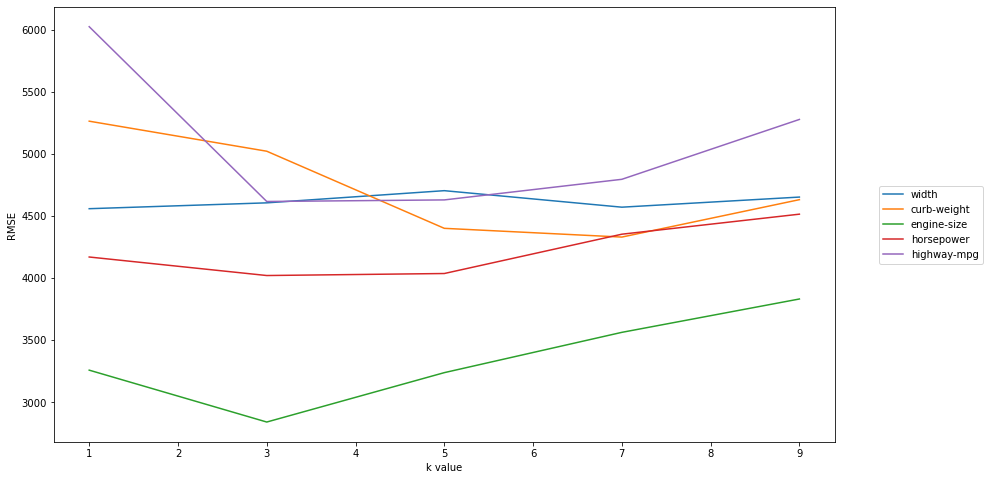

In [31]:
# List of column names with the Lowest RMSE
list_lowest_rmse_uni = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width']

# Dict of column names and RMSE with multiple K vals with the Lowest RMSE
dict_lowest_rmse_uni = {}
for k, v in dict_k_rmse_uni.items():
    if k in list_lowest_rmse_uni:
        dict_lowest_rmse_uni[k] = v
        
# Plot
fig = plt.figure(figsize=(14,8))
for k,v in dict_lowest_rmse_uni.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label="{}".format(k))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.legend(bbox_to_anchor = (1.05, 0.6))

- Among these 5 variables that produced the least RMSE, `engine-size` produced the lowest RMSE at k value of 3. 
- `highway-mpg` also appears to have its dip on k=3

Let's now increase the number of attributes we use to make our predictions. For example,  do we get less a smaller margin of error if we look at the cars with the most similar `engine size`, `horsepower`, `highway-mpg` etc rather than just one of these attributes.

---

###  Multivariate k-nearest neighbors models. 
Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

In [32]:
# Compute average RMSE across different `k` values for each feature.
features_avg_rmse = {}

for k,v in dict_k_rmse_uni.items():
    avg_rmse = np.mean(list(v.values()))
    features_avg_rmse[k] = avg_rmse
    
ser_avg_rmse = pd.Series(features_avg_rmse)
sorted_ser_avg_rmse = ser_avg_rmse.sort_values()
print(sorted_ser_avg_rmse)

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [33]:
# Lets drag the index out from 'sorted_ser_avg_rmse' for iteration purposes
sorted_features = sorted_ser_avg_rmse.index
sorted_features

Index(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'length', 'city-mpg', 'wheel-base', 'compression-rate', 'bore',
       'normalized-losses', 'stroke', 'peak-rpm', 'height'],
      dtype='object')

In [34]:
def knn_train_test(train_col_names, target_col_name, df, k):
    '''
    The function encapsulates the training and 
    simple validation process. It takes a single
    parameter for k.
    
    Args:
        train_col_name: Train's Column name
        target_col_name: Target Column name
        df : DataFrame
        k : n_neighbors
    Returns:
        RMSE of the columns
    '''
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    half = int(len(rand_df) / 2)
    
    # One for train other for test
    train_df = rand_df.iloc[0:half]
    test_df = rand_df.iloc[half:]
    
    # K values
    k = [k]
    k_rmse = {}
    
    for k_val in k:
        knn = KNeighborsRegressor(n_neighbors=k_val)
        # Fit a KNN model to train_df (features and target)
        knn.fit(train_df[train_col_names], train_df[target_col_name])

        # Predict 
        prediction = knn.predict(test_df[train_col_names])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col_name], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k_val] = rmse
    return k_rmse


In [35]:
k_rmse_results_5 = {}
for num_of_best_features in range(2,7):
    k_rmse_results_5['{} number of best features'.format(num_of_best_features)] = knn_train_test(sorted_features[:num_of_best_features], 'price', num_cars, 5)

In [36]:
print('Following results assume n_neighbors or k = 5')
k_rmse_results_5

Following results assume n_neighbors or k = 5


{'2 number of best features': {5: 2949.8817277180374},
 '3 number of best features': {5: 3580.7376651928435},
 '4 number of best features': {5: 3487.340917327035},
 '5 number of best features': {5: 3410.2170133901805},
 '6 number of best features': {5: 3478.510890118539}}

Text(0.5, 1.0, 'Impact of number of features on RMSE')

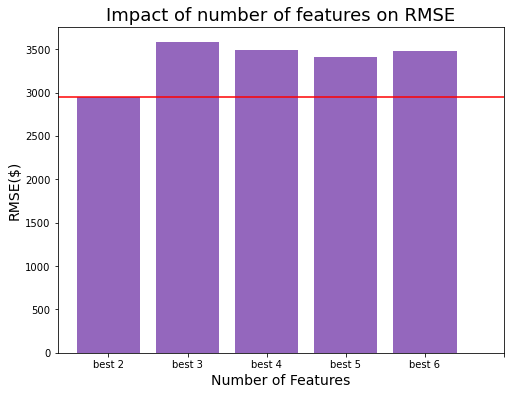

In [37]:
dict_5 = {}
for k1, v1 in k_rmse_results_5.items():
    key = k1
    for k2,v2 in v1.items():
        value = v2  
        dict_5[key] = value
plt.figure(figsize=(8,6))
for k,v in dict_5.items():
    x = list(dict_5.keys())
    y = list(dict_5.values())  
    plt.bar(x,y, label="{}".format(k))

# Settings
plt.xlabel('Number of Features',fontsize=14)
plt.ylabel('RMSE($)',fontsize=14)
plt.xticks(range(6), ['best 2', 'best 3', 'best 4', 'best 5', 'best 6'])
plt.axhline(y = min(y), color = 'r')
plt.title('Impact of number of features on RMSE',fontsize=18)

- 2 best features produces the least RMSE. However, we will still look for involving more features 

Let's now optimize these models that performed the best. We will optimize for the **best value of k**

---

### Hyperparameter Optimization

For the models in the last step, lets vary the hyperparameter value from **n_neighbors 1 to 25**

In [38]:
def knn_train_test(train_col_names, target_col_name, df):
    '''
    The function encapsulates the training and 
    simple validation process for a multiple
    parameters for k.
    
    Args:
        train_col_name: Train's Column name
        target_col_name: Target Column name
        df : DataFrame
    Returns:
        RMSE of the columns
    '''
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    half = int(len(rand_df) / 2)
    
    # One for train other for test
    train_df = rand_df.iloc[0:half]
    test_df = rand_df.iloc[half:]
    
    # K values
    k = [i for i in range(1, 25)]
    k_rmse = {}
    
    for k_val in k:
        knn = KNeighborsRegressor(n_neighbors=k_val)
        # Fit a KNN model to train_df (features and target)
        knn.fit(train_df[train_col_names], train_df[target_col_name])

        # Predict 
        prediction = knn.predict(test_df[train_col_names])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col_name], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k_val] = rmse
    return k_rmse

In [39]:
k_rmse_results = {}
for num_of_best_features in range(2,7):
    k_rmse_results['{} number of best features'.format(num_of_best_features)] = knn_train_test(sorted_features[:num_of_best_features], 'price', num_cars)

In [40]:
k_rmse_results

{'2 number of best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 number of best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.2164949472

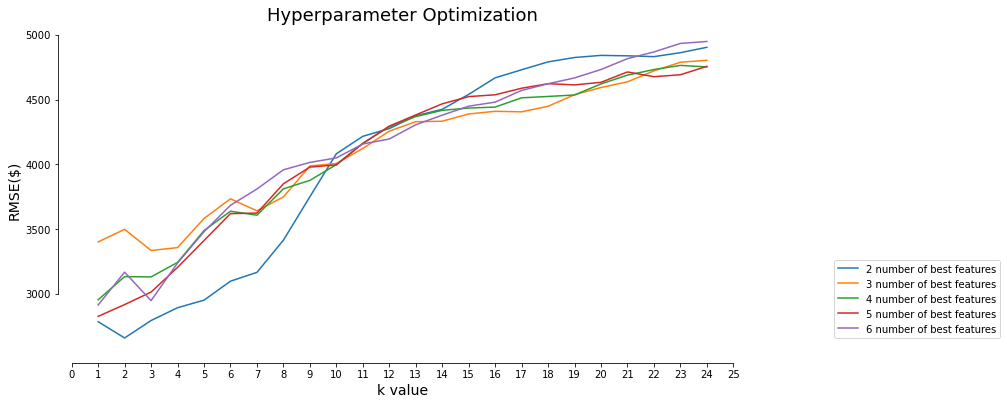

In [41]:
# Plot k values 
plt.figure(figsize=(12,6))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))

# Settings
plt.xlabel('k value',fontsize=14)
plt.ylabel('RMSE($)',fontsize=14)
plt.xticks(range(26))
plt.title('Hyperparameter Optimization',fontsize=18)
plt.legend(bbox_to_anchor = (1.4, 0.3))

# Aesthetics
sns.despine(offset=10, trim=True)

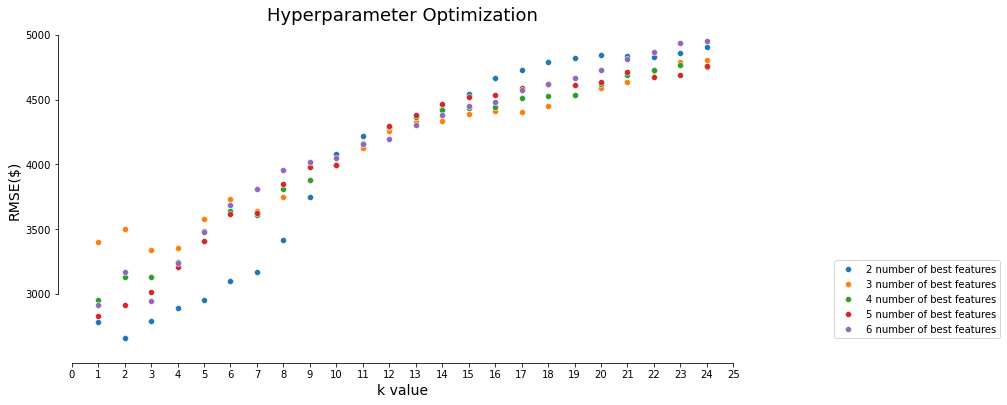

In [42]:
# Plot k values 
plt.figure(figsize=(12,6))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    sns.scatterplot(x=x, y=y, label="{}".format(k))

# Settings
plt.xlabel('k value',fontsize=14)
plt.ylabel('RMSE($)',fontsize=14)
plt.xticks(range(26))
plt.title('Hyperparameter Optimization',fontsize=18)
plt.legend(bbox_to_anchor = (1.4, 0.3))

# Aesthetics
sns.despine(offset=10, trim=True)


The lowest RMSE's are found in the lower **n_neighbors of 2 and 3**. The singular lowest score came from using the **2 attributes n_neighbors of 2**. 

So far, we have used the 75-25 train/test validation method. Let's finish by using a different technique k-folds.

Below we are going to loop through 1-25 k folds to see which gives the lowest RMSE.

---

## Using K-fold cross-validation
Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.

In [43]:
# from sklearn.model_selection import cross_val_score, KFold

In [44]:
def knn_train_test(train_col_names, target_col_name, df, folds):
    '''
    The function encapsulates the training and 
    K_fold cross validation process for a multiple
    parameters for k.
    
    Args:
        train_col_name: Train's Column names
        target_col_name: Target Column name
        df : DataFrame
        folds: K_folds
    Returns:
        mean RMSE of the columns
    '''
    
    kf = KFold(folds, shuffle=True, random_state=1)
    model = KNeighborsRegressor(3) # k = 3
    scores_mse = cross_val_score(model, df[train_col_names], 
                                 df[target_col_name], scoring="neg_mean_squared_error",
                                 cv=kf)
    rmse = []
    scores_mse = list(scores_mse)
    for mse in scores_mse:
        mse = abs(mse)
        root_mse = mse**(1/2)
        rmse.append(root_mse)
    return rmse, np.mean(rmse)

In [45]:
# list_lowest_rmse_uni = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width']

k_folds = list(range(2,26))
dict_k_folds_means = {}

# Loop through number of k folds
for k in k_folds:
    rmse_k = knn_train_test(list_lowest_rmse_uni, 'price', num_cars, k)
    dict_k_folds_means[k] = rmse_k[1]
    
dict_k_folds_means

{2: 3029.194644842433,
 3: 2893.1127608687457,
 4: 2792.183124444007,
 5: 2795.4208272594087,
 6: 2687.310588689465,
 7: 2763.9477341599986,
 8: 2618.2388938565737,
 9: 2599.8240753352675,
 10: 2609.5892508235,
 11: 2571.4670641160287,
 12: 2585.0921693490404,
 13: 2639.8347629627087,
 14: 2585.67986299579,
 15: 2531.7633742242224,
 16: 2515.0107547719463,
 17: 2489.2251812596137,
 18: 2447.7053300900984,
 19: 2494.992604928682,
 20: 2439.7763705528223,
 21: 2424.2170229855683,
 22: 2438.807148807649,
 23: 2432.0352721225127,
 24: 2426.1325609927653,
 25: 2419.9283457440597}

<font color = 'grey'> All credits for this plot goes to [Ulrich Stern](https://stackoverflow.com/users/1628638/ulrich-stern), as I edited the code he helped someone with his [answer](https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot) on stackoverflow 


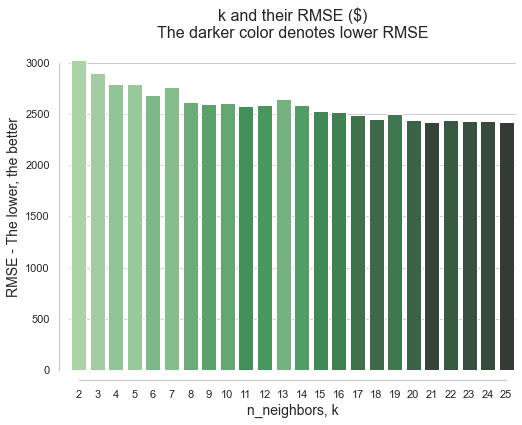

In [47]:
ser_dict_k_folds_means = pd.Series(dict_k_folds_means)
sns.set(style="whitegrid", color_codes=True)

data = ser_dict_k_folds_means   # data underlying bar plot in question

#plot
plt.figure(figsize=(8,6))
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])

# Settings
plt.xlabel('n_neighbors, k', fontsize=14)
plt.ylabel('RMSE - The lower, the better', fontsize=14)
plt.title('k and their RMSE ($)\nThe darker color denotes lower RMSE', fontsize=16)

# Aesthetics
sns.despine(offset=10, trim=True)

- Higher n_neighbor values tend to result in lower RMSE values. The lowest RMSE we could achieve with k within the range of 1-25 was at k=25 that is around USD 2,419
- Large values of k defeats the basic idea behind KNN as the points that are near might have similar densities or classes.
---

### Further Investigations and Recommendations

Lets plot the Distributions of `price`

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


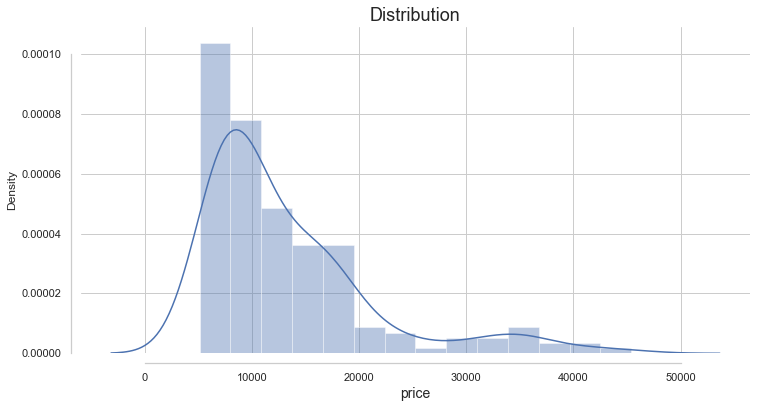

In [52]:
plt.figure(figsize=(12,6))

sns.distplot(num_cars['price'])

# Settings
plt.xlabel('price',fontsize=14)
plt.title('Distribution',fontsize=18)

# Aesthetics
sns.despine(offset=10, trim=True)

- **Clearly, the data is highly skewed.**
    - Imbalanced or skewed class distribution means that the number of data in one class is significantly different from other classes. The performance of kNN too is known to be affected by this problem. We can address this problem of an imbalance by **adding some more data for cars with higher prices**

Lets look closely to our top performing features. 

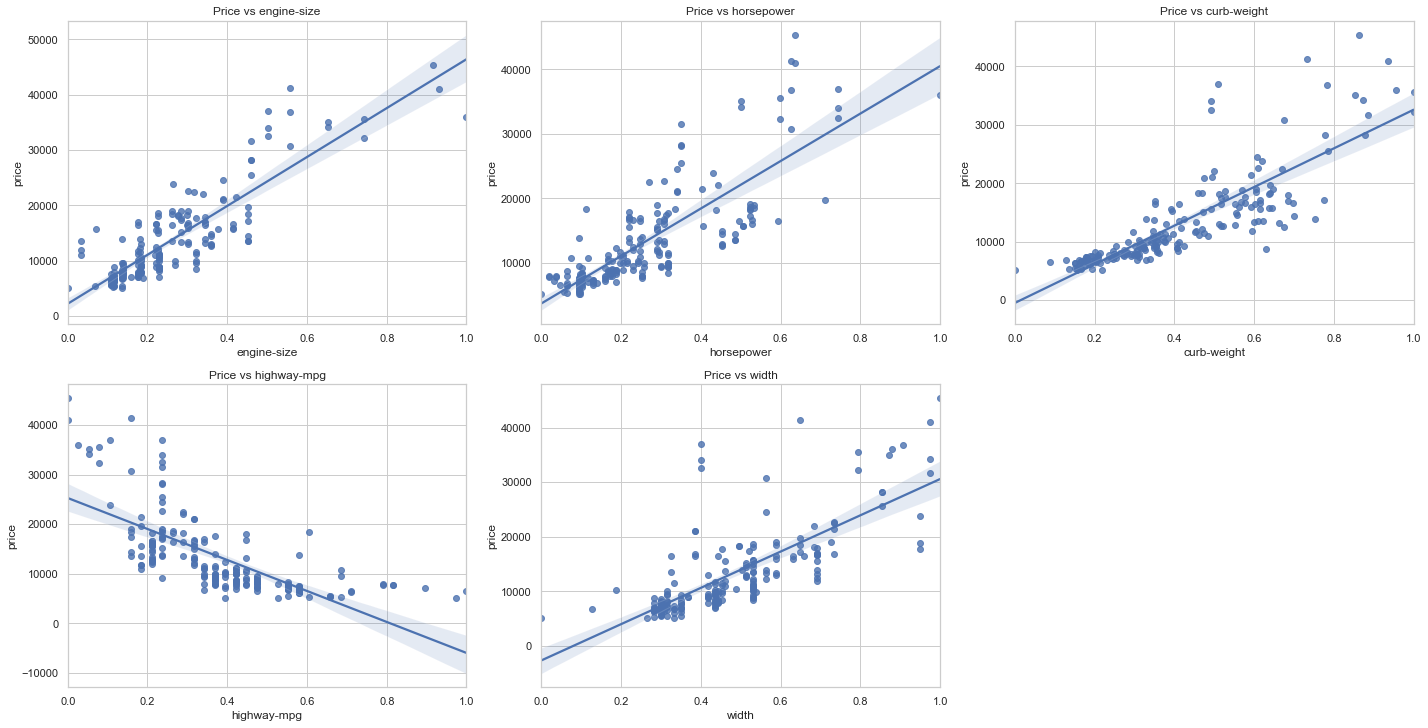

In [64]:
# list_lowest_rmse_uni = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width']

plt.subplots(figsize=(20,30))
i=1
for col in list_lowest_rmse_uni:
    plt.subplot(6,3,i)
    sns.regplot(x=col, y='price', data=num_cars)
    plt.title('Price vs '+ col)
    i+=1
plt.tight_layout()


- There is a good relationship among all the variables with `price` 

Lets look for the correlations of all the variables

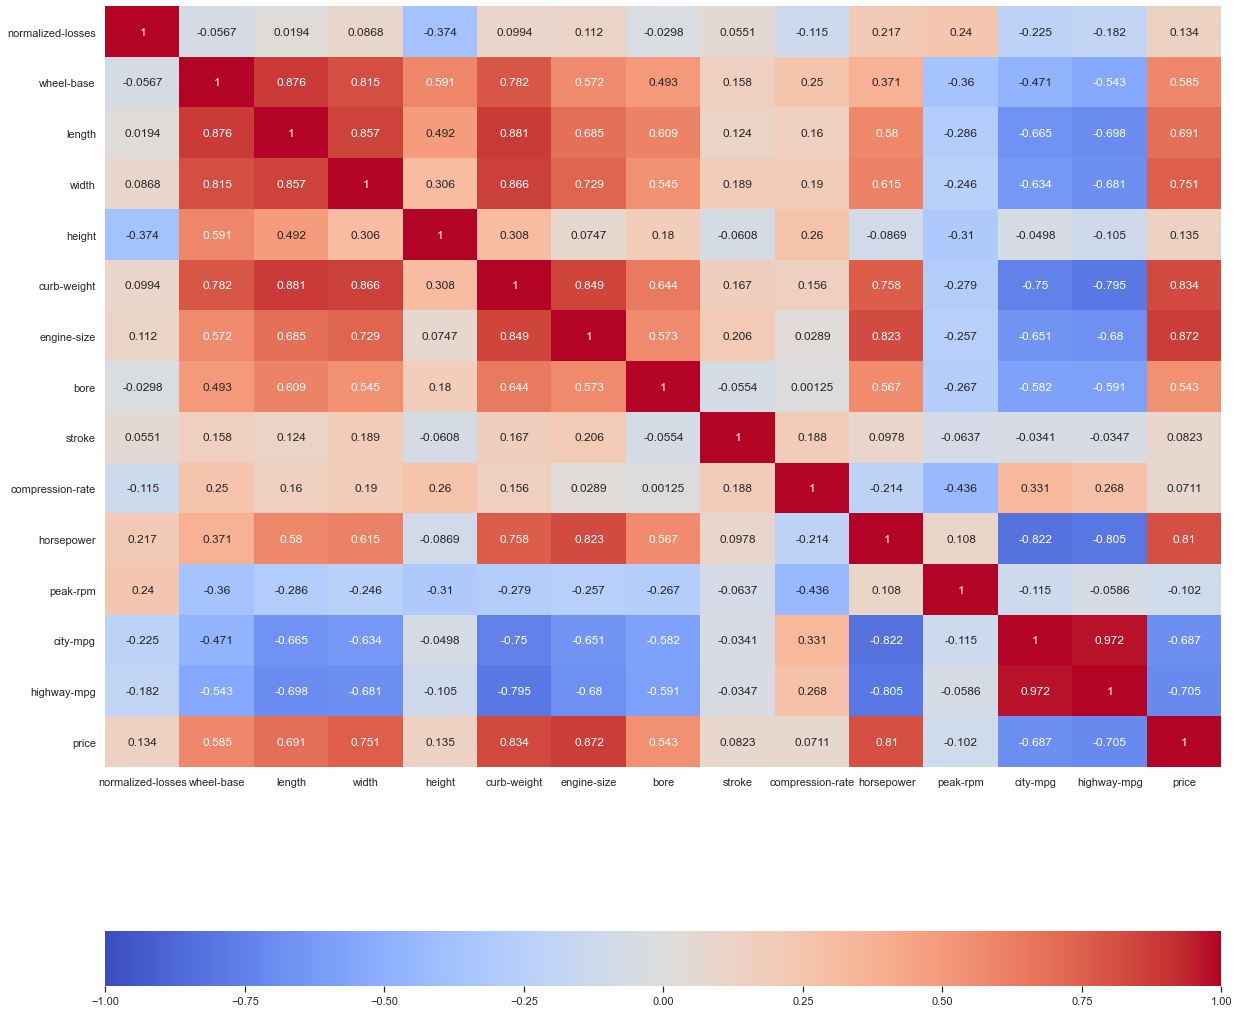

In [73]:
plt.figure(figsize=(20,20))
sns.heatmap(num_cars.corr(), annot=True, fmt='.3g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'})

Features such as `bore`, `lenght` and `wheel-base` also have significant correlation with `price` 

### Recommendations:
- Balancing the Dataset by adding more high price cars data
- Trying with other attributes
- Using different model than KNN Regressor